In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize

## Задача

Максимизировать функцию $g(x)=-x^5 - 10x^4 + 5x^3 + 10$

P.S. функции maximize нет в scipy

In [2]:
def g(x):
    return -x ** 5 - 10 * x ** 4 + 5 * x ** 3 + 10

def maximize(func, x0):
    return minimize(lambda x: -func(x), x0)

maximize(g, 10)

      fun: -10.059275200004635
 hess_inv: array([[0.17768891]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 20
     njev: 21
   status: 0
  success: True
        x: array([0.35889896])

## Задача

Построить график производной функции из прошлой задачи

Производную можно вычислить аналитически и задать как функцию в python

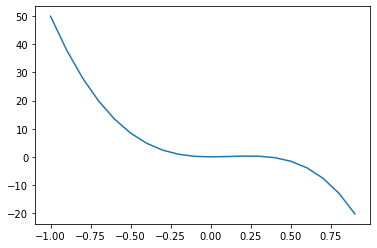

In [3]:
def g_prime(x):
    """Производная функции g"""
    return -5 * x ** 4 - 40 * x ** 3 + 15 * x ** 2

x = np.arange(-1, 1, 0.1)
y = g_prime(x)

plt.plot(x, y)

## Задача 

Диаметр подшипников, изготовленных на заводе, представляет собой случайную величину, распределенную нормально с математическим ожиданием 1,5 см и средним квадратическим отклонением 0,04 см.

Найти вероятность того, что размер наугад взятого подшипника колеблется от 1,4 до 1,6 см.

Оценить порядок величины можно при помощи правила трех сигм (точный ответ можно получить как в задаче выше)

In [5]:
import scipy.stats

# Функция Лапласа для стандартного нормального распределения
def normal_integral(x):
    return scipy.stats.norm.cdf(x) - 0.5

mean = 1.5
std = 0.04
a = (1.6 - mean) / std
b = (1.4 - mean) / std
answer = abs(normal_integral(b) - normal_integral(a))

round(answer * 100, 2)

98.76

Оценка по правилу трех сигм

In [14]:
sigma_2 = (mean - 2 * std, mean + 2 * std)
sigma_3 = (mean - 3 * std, mean + 3 * std)
print(sigma_2, '- +- 2 сигмы')
print(sigma_3, '- +- 3 сигмы')

for left_border, right_border in [sigma_2, sigma_3]:
    if left_border <= 1.4 <= right_border and \
        left_border <= 1.6 <= right_border:
        print(f'[1.4, 1.6] содержится внутри [{left_border:.2f}, {right_border:.2f}]')

(1.42, 1.58) - +- 2 сигмы
(1.38, 1.62) - +- 3 сигмы
[1.4, 1.6] содержится внутри [1.38, 1.62]


## Задача

По данным о погоде определить:

- вероятность того, что температура будет в промежутке от 10 до 20 градусов
- вероятность того, что температура изменится больше, чем на 5 градусов на следующий день
- вероятность получить отрицательную температуру зимой

In [3]:
# Ваш код здесь
df = pd.read_csv('../data/weather.csv', index_col=0, parse_dates=True)
df.head()

,t
Day,
2008-01-01,0
2008-01-02,-5
2008-01-03,-11
2008-01-04,-11
2008-01-05,-12


Вероятность того, что температура будет в промежутке от 10 до 20 градусов

In [4]:
df[(df['t'] > 10) & (df['t'] < 20)]['t'].count() / df['t'].count()

0.2800608828006088

Вероятность того, что температура изменится больше, чем на 5 градусов на следующий день

In [5]:
diff_t = df['t'].diff().dropna().abs()
diff_t[diff_t > 5].count() / diff_t.count()

0.08252131546894031

Вероятность получить отрицательную температуру зимой

In [6]:
df['month'] = df.index.month
winter_df = df[df['month'].isin([12, 1, 2])]
winter_df[winter_df['t'] < 0]['t'].count() / winter_df['t'].count()

0.6108374384236454

## Задача

По тем же данным посчитать:

- вероятность получить отрицательную температуру, используя формулу полной вероятности (для времен года).
- вероятность, что сейчас зима, если известно, что температура отрицательна.

In [10]:
def get_season(df, month_list):
    """Получаем датафрейм по указанным временам года"""
    return df[df['month'].isin(month_list)]

def get_negative_t(df):
    """Получаем датафрейм с отрицательной температурой"""
    return df[df['t'] < 0]

def get_p_b_i(df, month_list):
    """Считаем процент указанных месяцев от всего датафрейма (вероятность P(B_i))"""
    return len(get_season(df, month_list)) / len(df)

def get_p_a_b_i(df, month_list):
    """Считаем вероятность P(A|B_i) - вероятность получить отрицательную температуру в i-ом времени года"""
    season_df = get_season(df, month_list)
    season_negative_t = get_negative_t(season_df)
    return len(season_negative_t) / len(season_df)

def full_probability(p_b, p_a_b):
    """Формула полной вероятности (представляет из себя скалярное произведение, если присмотреться)"""
    return np.array(p_b) @ np.array(p_a_b)

# Задаем месяцы для времен года
winter_months = [1, 2, 12]
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]
autumn_months = [9, 10, 11]

# Времена года складываем в список
seasons = [winter_months, spring_months, summer_months, autumn_months]
# Для каждого времени года считаем P(B_i) и P(A|B_i)
p_b = [get_p_b_i(df, months) for months in seasons]
p_a_b = [get_p_a_b_i(df, months) for months in seasons]
# Считаем полную вероятность
p_a = full_probability(p_b, p_a_b)
p_a

0.19726027397260273

Вспомним формулу Байеса:

In [11]:
p_b_winter_a = get_p_a_b_i(df, winter_months) * get_p_b_i(df, winter_months) / p_a
p_b_winter_a

0.7654320987654322